<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados populacionais gerais
## Creating dataframes


In [32]:
install.packages('nortest')
library('ggplot2')
library('dplyr')
library('nortest')
set.seed(1234)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [17]:
# Open file
df <- read.csv('suicidio_prop_100k_hab_ano_2010-2017.csv')

# Transpose columns as rows
# t_df <- setNames(data.frame(t(df[,-1])), df[,1])
# t_df <- tibble::rowid_to_column(t_df, 'month')
df$proporcao <- df$obitos_por_residencia / df$pop_br_ibge
df$proporcao_100k <- (df$obitos_por_residencia * 100000) / df$pop_br_ibge
df

ano_do_obito,obitos_por_residencia,pop_br_ibge,proporcao,proporcao_100k
<int>,<int>,<int>,<dbl>,<dbl>
2010,9448,194890682,4.847846e-05,4.847846
2011,9852,196603732,5.011095e-05,5.011095
2012,10321,198314934,5.204348e-05,5.204348
2013,10533,200004188,5.266390e-05,5.266390
2014,10653,201717541,5.281147e-05,5.281147
2015,11178,203475683,5.493531e-05,5.493531
2016,11433,205156587,5.572816e-05,5.572816
2017,12495,206804741,6.041931e-05,6.041931


In [4]:
df_mes <- read.csv('suicidios_mes_2015-2017.csv')
t_df_mes <- setNames(data.frame(t(df_mes[,-1])), df_mes[,1])
t_df_mes <- tibble::rowid_to_column(t_df_mes, 'month')
t_df_mes$'2017_prop_100k' <- (t_df_mes$'2017_obt' * 100000) / t_df_mes$'2017_pop'
t_df_mes$'2016_prop_100k' <- (t_df_mes$'2016_obt' * 100000) / t_df_mes$'2016_pop'
t_df_mes$'2015_prop_100k' <- (t_df_mes$'2015_obt' * 100000) / t_df_mes$'2015_pop'

t_df_mes

month,2017_obt,2016_obt,2015_obt,2017_pop,2015_pop,2016_pop,2017_prop_100k,2016_prop_100k,2015_prop_100k
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1059,941,1047,206003753,202609241,204314268,0.5140683,0.4605650,0.5167583
2,967,926,852,206143689,202751801,204455719,0.4690903,0.4529098,0.4202182
3,1055,929,947,206283480,202894285,204597060,0.5114321,0.4540632,0.4667455
4,923,919,935,206423124,203036688,204738287,0.4471398,0.4488657,0.4605079
5,1029,927,899,206562618,203179009,204879397,0.4981540,0.4524613,0.4424670
6,932,879,867,206701959,203321245,205020388,0.4508907,0.4287378,0.4264188
7,938,925,851,206841144,203463392,205161258,0.4534881,0.4508649,0.4182571
8,1071,910,915,206980170,203605449,205302002,0.5174409,0.4432495,0.4493986
9,1135,962,902,207119034,203747412,205442619,0.5479941,0.4682573,0.4427050


## Normality test and graphs for 2017

In [34]:
# Normality test with Shapiro-Wilk for 2017 suicide sample during the months
shapiro.test(t_df_mes$'2017_obt')


	Shapiro-Wilk normality test

data:  t_df_mes$"2017_obt"
W = 0.94165, p-value = 0.5198


In [6]:
# Normality test with Kolmogorov-Smirnov for 2017 suicide sample during the months
ks.test(t_df_mes$'2017_obt', "pnorm", mean(t_df_mes$'2017_obt'), sd(t_df_mes$'2017_obt'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2017_obt"
D = 0.1448, p-value = 0.9322
alternative hypothesis: two-sided


In [33]:
# Anderson-Darling normality test for 2017 suicide sample during the months
ad.test(t_df_mes$'2017_obt')


	Anderson-Darling normality test

data:  t_df_mes$"2017_obt"
A = 0.31865, p-value = 0.4891


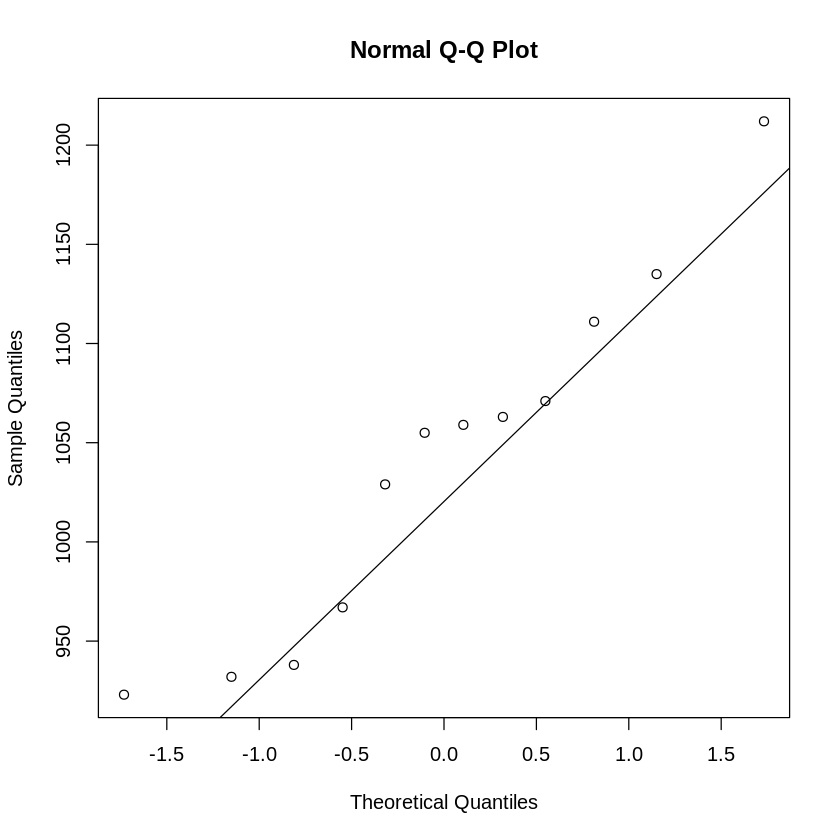

In [37]:
qqnorm(t_df_mes$'2017_obt')
qqline(t_df_mes$'2017_obt')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

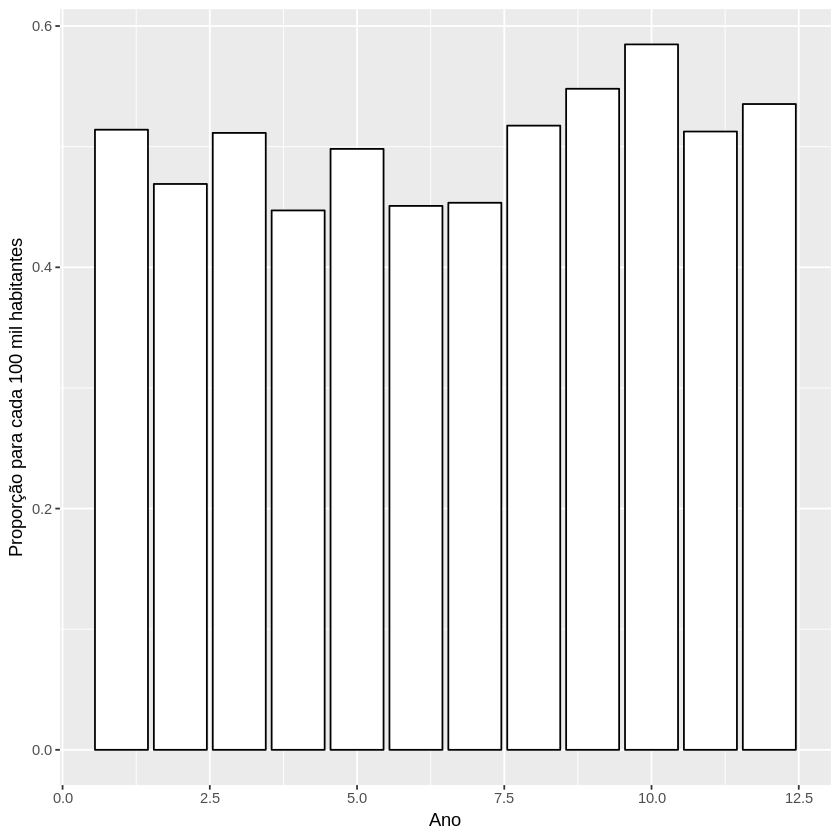

In [40]:
# Plot graph to proportion 2017 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2017_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

## Normality test and graphs for 2016

In [7]:
# Normality test with Shapiro-Wilk for 2016 proportion (100k) during the months
shapiro.test(t_df_mes$'2016_obt')


	Shapiro-Wilk normality test

data:  t_df_mes$"2016_obt"
W = 0.85154, p-value = 0.03836


In [8]:
# Normality test with Kolmogorov-Smirnov for 2016 proportion (100k) during the months
ks.test(t_df_mes$'2016_obt', "pnorm", mean(t_df_mes$'2016_obt'), sd(t_df_mes$'2016_obt'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2016_obt"
D = 0.25027, p-value = 0.3766
alternative hypothesis: two-sided


In [35]:
# Anderson-Darling normality test for 2016 suicide sample during the months
ad.test(t_df_mes$'2016_obt')


	Anderson-Darling normality test

data:  t_df_mes$"2016_obt"
A = 0.87921, p-value = 0.01655


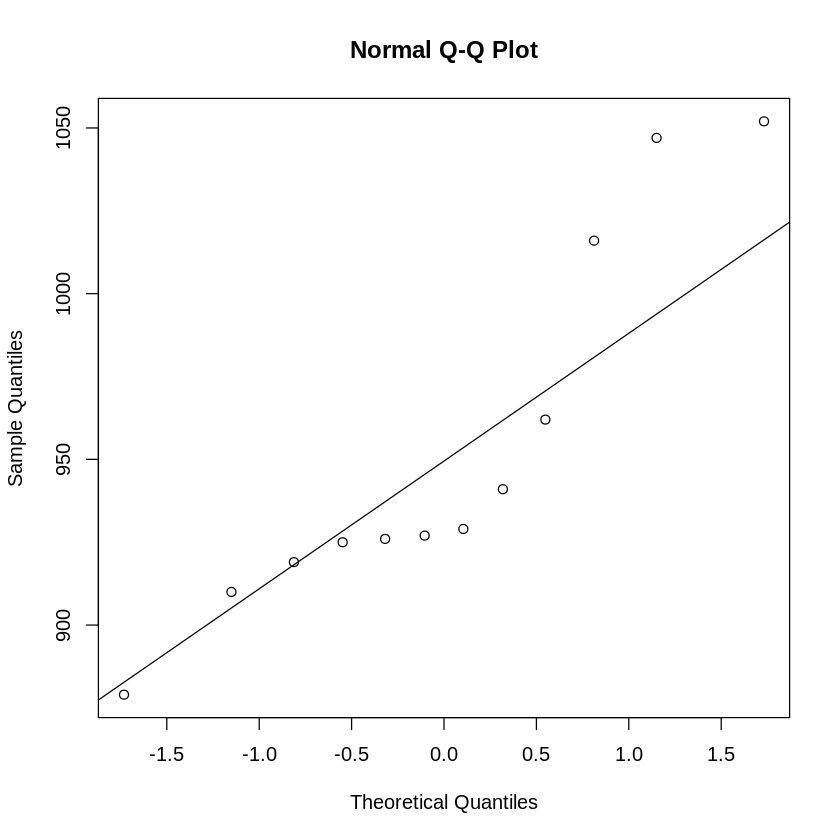

In [38]:
qqnorm(t_df_mes$'2016_obt')
qqline(t_df_mes$'2016_obt')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

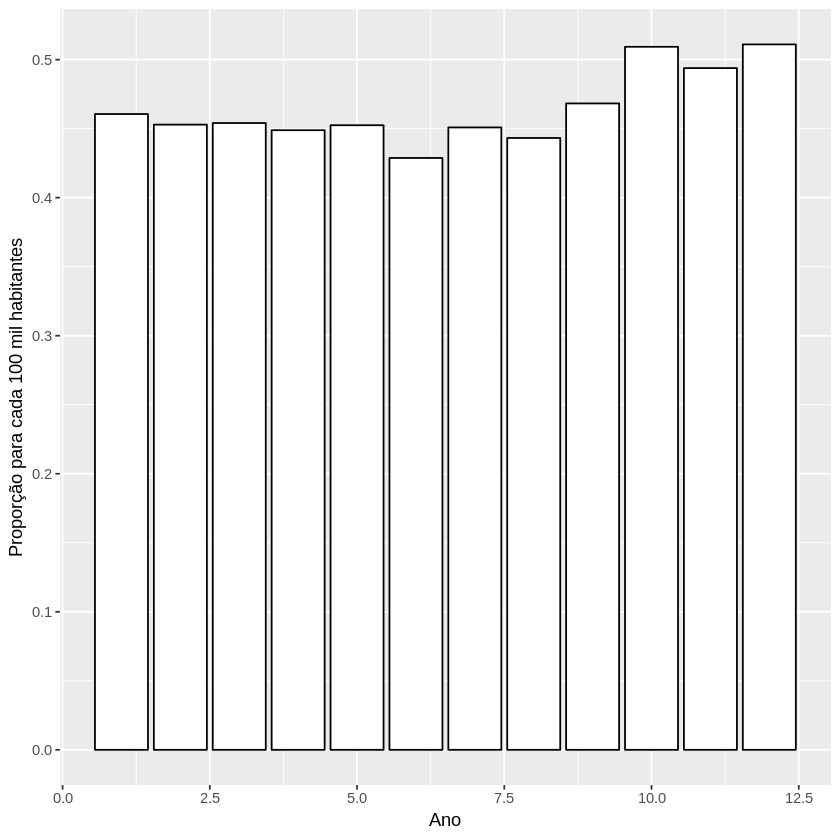

In [41]:
# Plot graph to proportion 2016 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2016_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

## Normality test and graphs for 2015

In [9]:
# Normality test with Shapiro-Wilk for 2015 proportion (100k) during the months
shapiro.test(t_df_mes$'2015_obt')


	Shapiro-Wilk normality test

data:  t_df_mes$"2015_obt"
W = 0.90641, p-value = 0.1918


In [11]:
# Normality test with Kolmogorov-Smirnov for 2015 proportion (100k) during the months
ks.test(t_df_mes$'2015_obt', "pnorm", mean(t_df_mes$'2015_obt'), sd(t_df_mes$'2015_obt'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2015_obt"
D = 0.15979, p-value = 0.8725
alternative hypothesis: two-sided


In [36]:
# Anderson-Darling normality test for 2015 suicide sample during the months
ad.test(t_df_mes$'2015_obt')


	Anderson-Darling normality test

data:  t_df_mes$"2015_obt"
A = 0.42359, p-value = 0.266


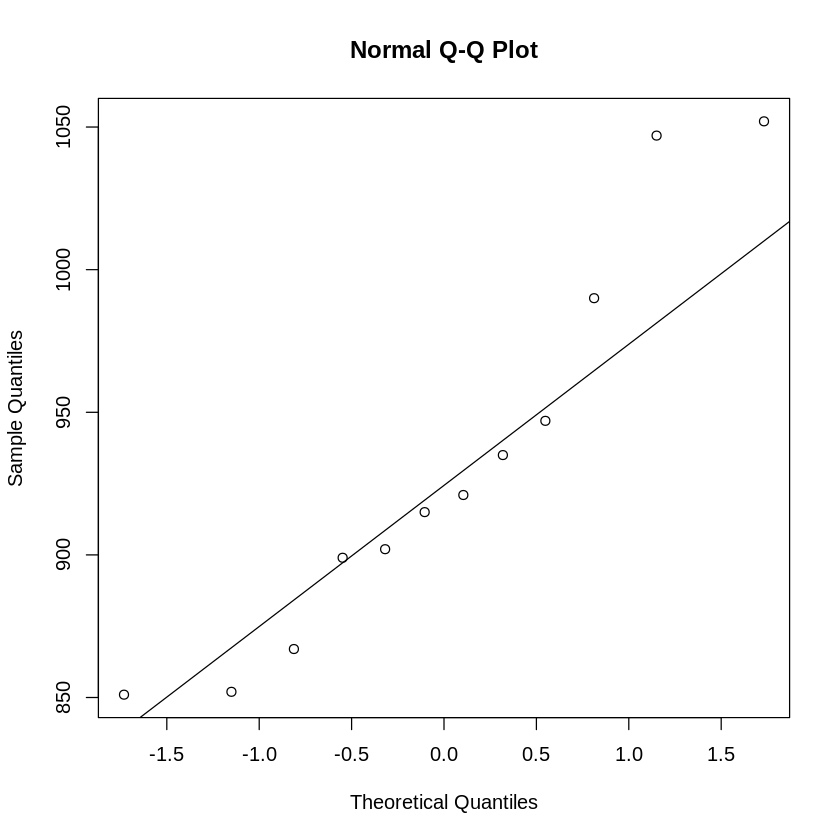

In [39]:
qqnorm(t_df_mes$'2015_obt')
qqline(t_df_mes$'2015_obt')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

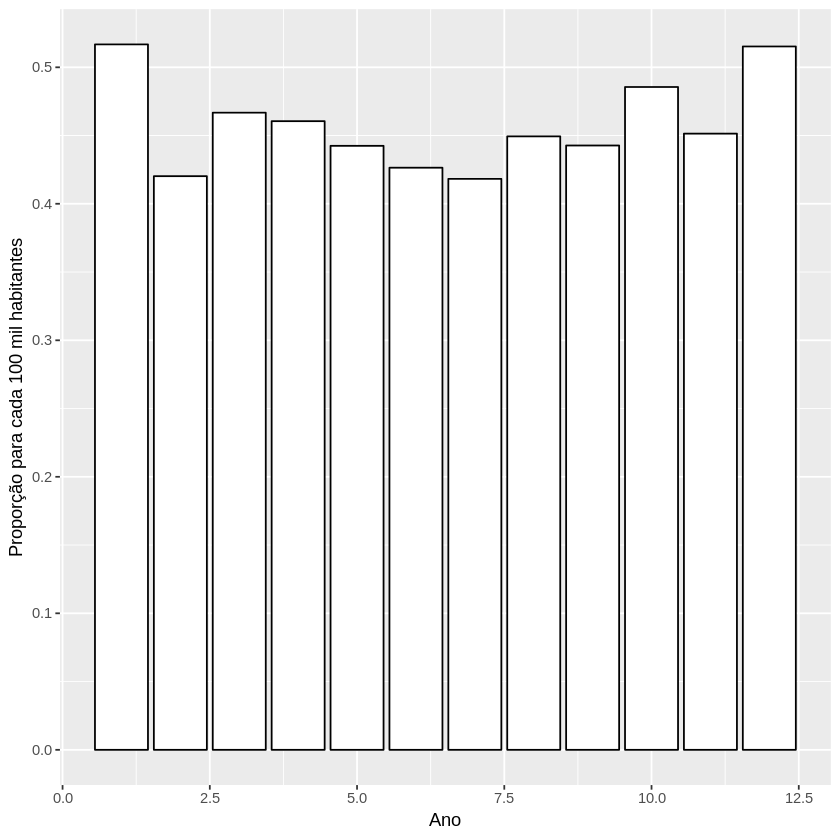

In [42]:
# Plot graph to proportion 2015 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2015_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

## Interpretation

> Como vimos, não conseguimos rejeitar a hipótese nula  (`p > 0.05`)  para os dados nos anos de 2015 e 2017, porém em 2016 foi possível rejeitar a hipótese nula (`p < 0.05`). Assim, os conjuntos de dados de 2015 e 2017 foram extraídos de uma população com distribuição normal, enquanto os dados de 2016 vieram de uma distribuição não-normal.


## Teste de hipótese para duas proporções

In [24]:
# There are difference between 2015 and 2016 proportions
prop.test(
  x=c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]), 
  n=c(df$pop_br_ibge[6], df$pop_br_ibge[7]),
  alternative='less', correct=FALSE)


	2-sample test for equality of proportions without continuity
	correction

data:  c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]) out of c(df$pop_br_ibge[6], df$pop_br_ibge[7])
X-squared = 1.1606, df = 1, p-value = 0.1407
alternative hypothesis: less
95 percent confidence interval:
 -1.000000e+00  4.176429e-07
sample estimates:
      prop 1       prop 2 
5.493531e-05 5.572816e-05 


> Ao nível de 95 % de confiança **não há forte evidência** de diferença (`p > 0.05`) entre as proporções de suicídios de 2015 e 2016. Ao contrário do que foi afirmado na reportagem, em que houve aumento de um ano para o outro

In [25]:
# And about 2016 to 2017?
prop.test(
  x=c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]), 
  n=c(df$pop_br_ibge[7], df$pop_br_ibge[8]),
  alternative='less', correct=FALSE)


	2-sample test for equality of proportions without continuity
	correction

data:  c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]) out of c(df$pop_br_ibge[7], df$pop_br_ibge[8])
X-squared = 39.023, df = 1, p-value = 2.094e-10
alternative hypothesis: less
95 percent confidence interval:
 -1.000000e+00 -3.456125e-06
sample estimates:
      prop 1       prop 2 
5.572816e-05 6.041931e-05 


> Ao nível de 95 % de confiança **há fortes evidências** da diferença (`p < 0.05`) de proporções de suicídios de 2016 e 2017.[link text](https://)

## Referências

1. Dados no [repositório](https://github.com/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb)
2. [Comparison of two proportions: parametric (Z-test) and non-parametric (chi-squared) methods](https://www.r-bloggers.com/comparison-of-two-proportions-parametric-z-test-and-non-parametric-chi-squared-methods/)
3. [Normality tests don’t do what you think they do](https://www.r-bloggers.com/normality-tests-don%E2%80%99t-do-what-you-think-they-do/)